In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Afficher lire le dataset
df = pd.read_excel('../data/online_retail_II.xlsx')



In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Période couverte
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [6]:
# Nombre de lignes
print(df.shape[0])

# Nombre de clients uniques
print(df['Customer ID'].nunique())

# Nombre de produits uniques
print(df['StockCode'].nunique())

# Nombre de pays
print(df['Country'].nunique())


525461
4383
4632
40


# 📄 Fiche Synthétique du Jeu de Données — Online Retail II (UCI)

## 1. Source
- **Nom :** Online Retail II  
- **Origine :** UCI Machine Learning Repository  


---

## 2. Période couverte
- **Du :** 1er décembre 2009  
- **Au :** 9 décembre 2010 

---

## 3. Volume
- **Nombre total de lignes :** ~ **525461**  
- **Nombre de clients uniques (Customer ID) :** ~ **4 383**  
- **Nombre de produits (StockCode uniques) :** ~ **4 632**  
- **Nombre de pays représentés :** **40**  


---

## 4. Colonnes :
| Colonne | Description |
|---------|-------------|
| **Invoice** | Identifiant de la facture (les retours commencent par "C"). |
| **InvoiceDate** | Date et heure exactes de la transaction. |
| **StockCode** | Code unique du produit. |
| **Description** | Nom du produit vendu. |
| **Quantity** | Quantité vendue (négatif = retour). |
| **Price** | Prix unitaire HT. |
| **Customer ID** | Identifiant du client (peut être manquant). |
| **Country** | Pays du client. |



In [7]:
#type des varibles 
df.dtypes 

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

#  Dictionnaire des variables

| Nom de la variable | Type | Sémantique / Signification | Unités / Valeurs possibles |
|--------------------|------|-----------------------------|-----------------------------|
| **Invoice** | object (string) | Identifiant unique de la facture. | Chaîne alphanumérique |
| **StockCode** | object (string) | Code unique du produit vendu. | Chaîne alphanumérique |
| **Description** | object (string) | Nom / description du produit. | Texte |
| **Quantity** | int64 | Quantité vendue dans cette ligne de facture. | Entier (négatif = retour) |
| **InvoiceDate** | datetime64 | Date et heure de l’achat. | Format DateTime |
| **Price** | float64 | Prix unitaire du produit. | £ (livres sterling) |
| **Customer ID** | float64 | Identifiant unique du client. | Nombre (souvent manquant) |
| **Country** | object (string) | Pays du client. | 38 pays |



# Analyser les valeurs manquantes 

In [8]:
#valeurs manquantes
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
#supprimer les valeurs manquantes de la colonne 'Customer ID'
df=df.dropna(subset=['Customer ID'])

In [10]:
#remplacer les valeurs manquantes de la colonne 'Description' par 'Unknown'
df['Description']=df['Description'].fillna('Unknown')

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# Gérer les doublons

In [12]:

df.duplicated().sum()


6771

In [13]:
# Supprimer les doublons 
df = df.drop_duplicates()


In [14]:
df.duplicated().sum()

0

# Gérer les outliers 


In [15]:
df['Price'].describe()


count    410763.000000
mean          3.908358
std          71.714794
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       25111.090000
Name: Price, dtype: float64

In [16]:
df['Quantity'].describe()

count    410763.000000
mean         12.923735
std         102.039550
min       -9360.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [17]:
df_clean=df.copy()

In [18]:
# Garder uniquement les ventes “normales”
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['Price'] > 0]

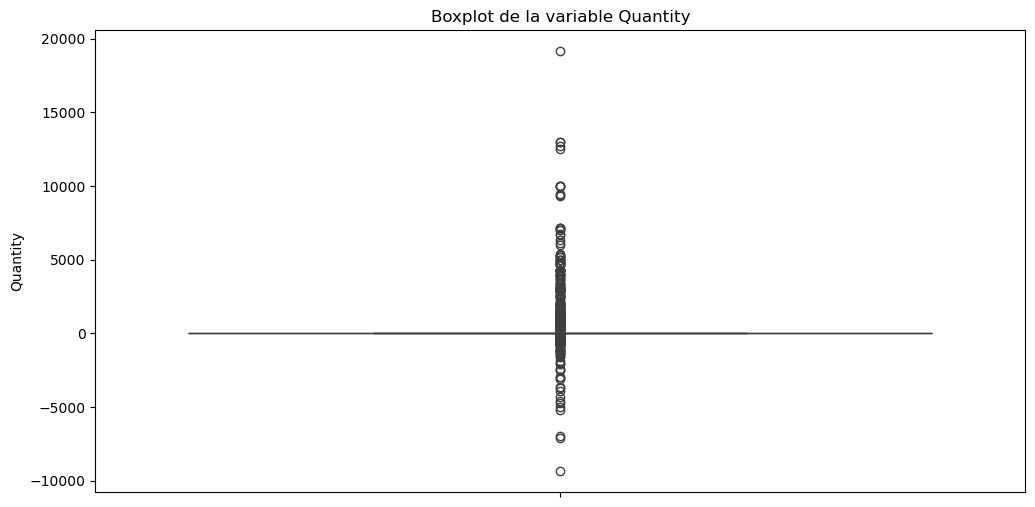

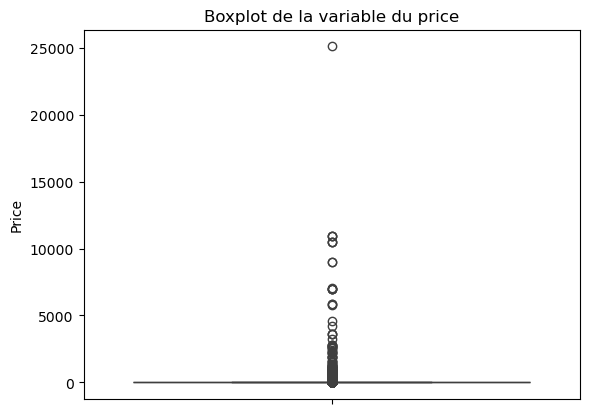

In [19]:
#visualisation des outliers
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot de la variable Quantity')
plt.show()
sns.boxplot(y=df['Price'])
plt.title('Boxplot de la variable du price')
plt.show()

In [20]:
# --- Outliers Quantity ---
Q1_qty = df_clean['Quantity'].quantile(0.25)
Q3_qty = df_clean['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_qty = Q1_qty - 1.5*IQR_qty
upper_qty = Q3_qty + 1.5*IQR_qty

df_clean = df_clean[(df_clean['Quantity'] >= lower_qty) & (df_clean['Quantity'] <= upper_qty)]

# --- Outliers Price ---
Q1_price = df_clean['Price'].quantile(0.25)
Q3_price = df_clean['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5*IQR_price
upper_price = Q3_price + 1.5*IQR_price

df_clean = df_clean[(df_clean['Price'] >= lower_price) & (df_clean['Price'] <= upper_price)]


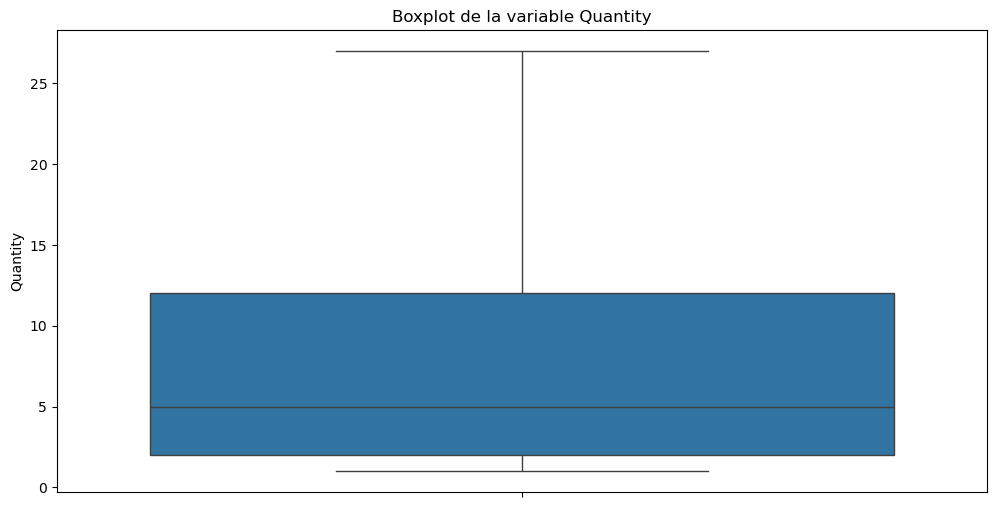

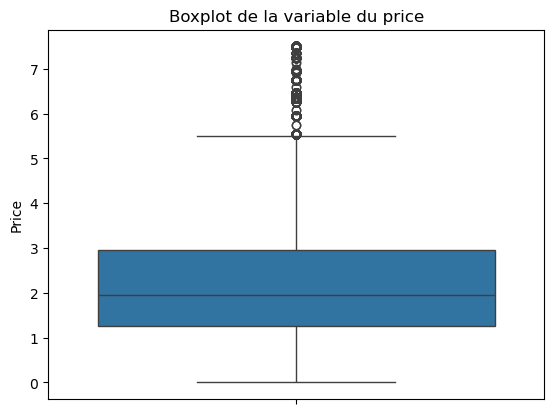

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df_clean['Quantity'])
plt.title('Boxplot de la variable Quantity')
plt.show()
sns.boxplot(y=df_clean['Price'])
plt.title('Boxplot de la variable du price')
plt.show()

#  Exclure les factures annulées

In [22]:
df_clean = df_clean[~df_clean['Invoice'].astype(str).str.startswith('C')]


In [23]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')


In [24]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,2009-12


# Graphiques visuels

##  Distribution de la variable Quantity

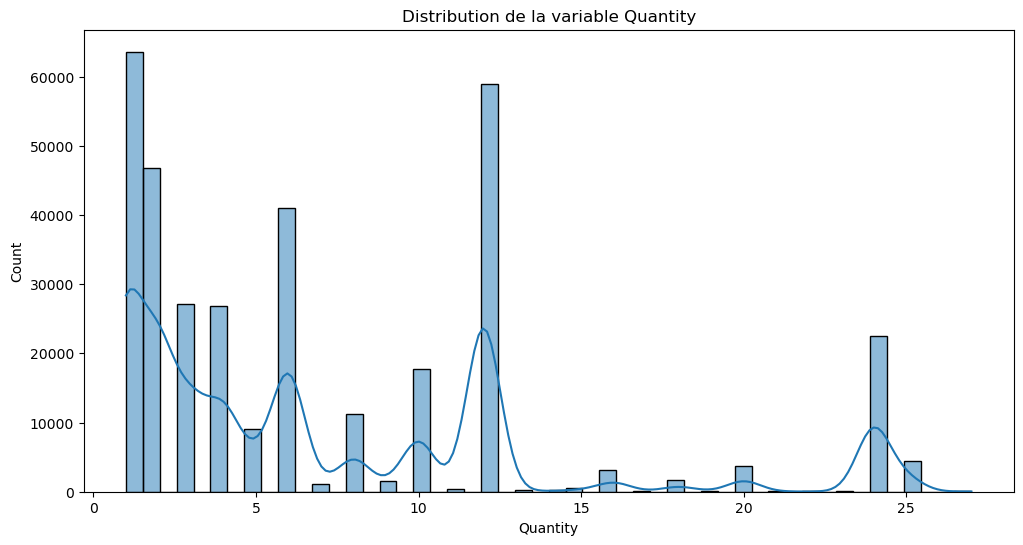

In [25]:

plt.figure(figsize=(12,6))
sns.histplot(df_clean['Quantity'], bins=50, kde=True)
plt.title('Distribution de la variable Quantity')
plt.show()



## 1. Description du Graphique
- **Type** : Histogramme de distribution
- **Variable** : `Quantity` (quantité d'unités par ligne de commande)


## 2. Observations Clés

### Distribution Extrêmement Asymétrique
- **Pic principal** : très petites quantités (0-10 unités)
- **Maximum** : ~40,000-50,000 occurrences pour les petites quantités
- **Queue de distribution** : jusqu'à 25+ unités


### Concentration sur les Petites Quantités
- **Majorité écrasante** des commandes : petites quantités (0-10 unités)
- **Quelques commandes** avec quantités importantes (15-25+ unités)
- **Comportement B2C dominant** avec quelques clients B2B potentiels

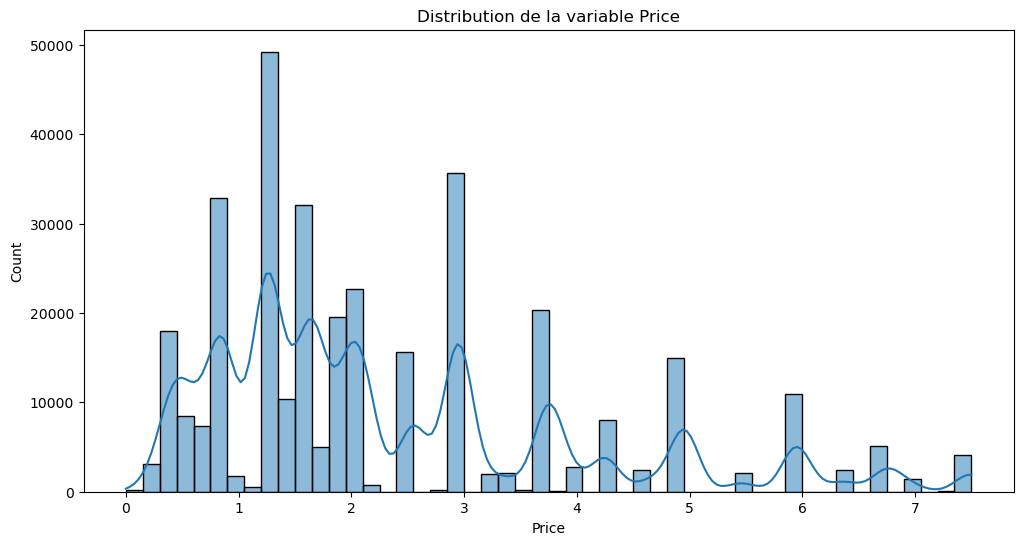

In [26]:
#Distribution de la variable Price
plt.figure(figsize=(12,6))
sns.histplot(df_clean['Price'], bins=50, kde=True)
plt.title('Distribution de la variable Price')
plt.show()

# Analyse de la Distribution des Prix

## 1. Description du Graphique
- **Type** : Histogramme de distribution
- **Variable** : `Price` (prix unitaire des produits)

## 2. Observations Clés

### Distribution Très Asymétrique
- **Pic principal** : 0-2 unités monétaires
- **Maximum** : ~50,000 occurrences pour les prix bas
- **Queue de distribution** : jusqu'à 7 unités
- **Absence de valeurs négatives**

### Concentration sur les Bas Prix
- **> 80%** des transactions concernent des produits à prix bas (0-2 unités)
- **Très peu** de produits premium (prix > 3 unités)
- **Prix maximum visible** : 7 unités seulement





##  En Résumé


 **Des produits pas chers**  
 **Des achats fréquents**  


**Les meilleurs clients** : ceux qui reviennent souvent acheter des petites quantités de produits peu chers !

# 2. Distributions par Pays


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'EIRE'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Belgium'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Channel Islands')])

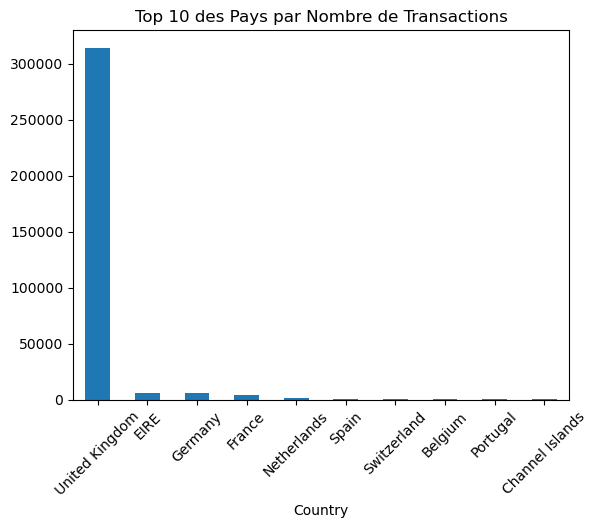

In [27]:
df_clean['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des Pays par Nombre de Transactions')
plt.xticks(rotation=45)

#  Ce Que le Graphique Nous Montre

###  Classement des Pays :
1. **United Kingdom** - Leader écrasant
2. **EIRE** (Irlande) - Distant second
3. **Germany** - 3ème position
4. **France** - 4ème place
5. **Netherlands** - 5ème
6. **Spain** - 6ème
7. **Switzerland** - 7ème
8. **Belgium** - 8ème
9. **Portugal** - 9ème
10. **Sweden** - 10ème

##  Observations Immédiates

###  Dominance Écrasante du Royaume-Uni
- **UK représente probablement >80%** du volume total
- **Écart énorme** entre UK et le deuxième (EIRE)
- **Business très localisé** géographiquement

###  Points Forts
- **Base solide** dans le marché domestique (UK)
- **Présence naturelle** dans les grands marchés européens
- **Diversification** géographique existante

###  Points d'Attention
- **Dépendance forte** au marché UK
- **Potentiel de croissance** à l'international sous-exploité

# Distribution des produits 

Text(0.5, 1.0, 'Top 20 des produits les plus vendues')

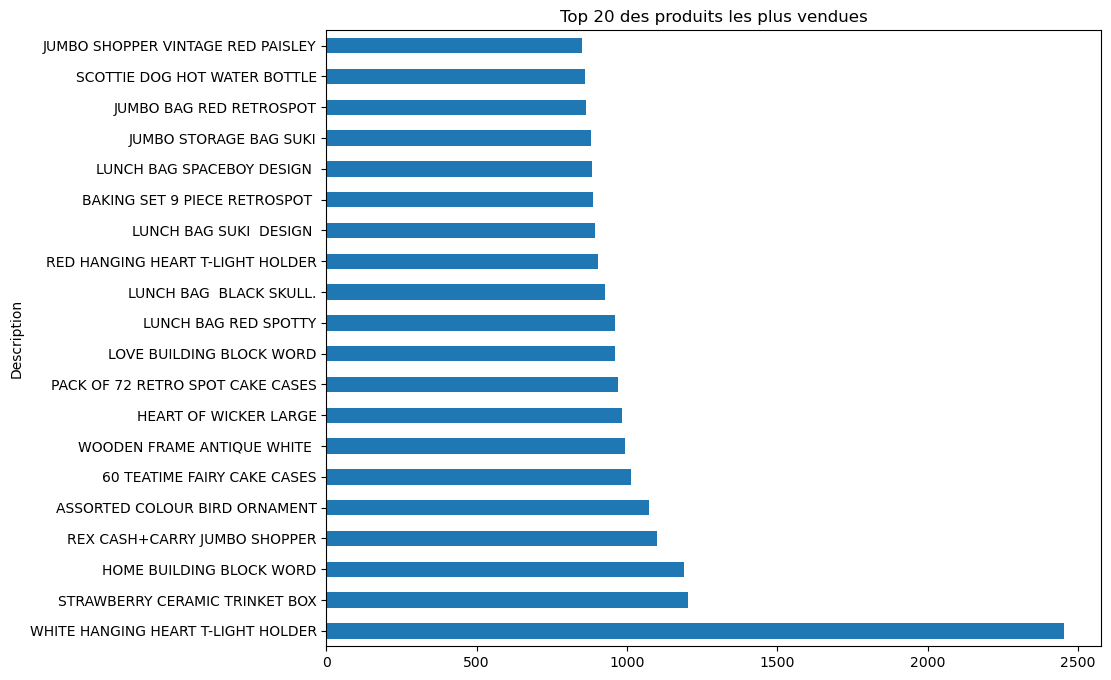

In [28]:
# Top 2O des produits les plus vendues 
df_clean['Description'].value_counts().head(20).plot(kind='barh', figsize=(10,8))
plt.title('Top 20 des produits les plus vendues')

#  Analyse du Top 20 des Produits les Plus Vendus

##  Description du Graphique

Ce graphique montre les **20 produits les plus vendus** en termes de **quantité** (nombre d'unités vendues). Les produits sont classés du **plus vendu** (en bas) au **20ème** (en haut).

##  Observations Clés

###  Top 5 des Produits les Plus Vendus :
1. **WHITE HANGING HEART T-LIGHT HOLDER** (~2,500 unités)
2. **STRAWBERRY CERAMIC TRINKET BOX**
3. **HOME BUILDING BLOCK WORD**
4. **REX CASH+CARRY JUMBO SHOPPER**
5. **ASSORTED COLOUR BIRD ORNAMENT**

###  Catégories Dominantes :
- **Décoration maison** (8 produits) : porte-bougies, cadres, suspensions
- **Sacs et bags** (6 produits) : lunch bags, jumbo shoppers
- **Cuisine/pâtisserie** (4 produits) : moules à cake, sets de baking
- **Décoration divers** (2 produits) : ornaments, building blocks

###  Style Identitaire Fort :
- **Thème rétro/vintage** : "RETROSPOT", "VINTAGE"
- **Motifs à pois** : "RED SPOTTY", "RETRO SPOT"
- **Éléments romantiques** : cœurs, fleurs, "LOVE"
- **Couleurs** : rouge, blanc, motifs paisley


Text(0.5, 1.0, 'Top 15 Produits Premium ')

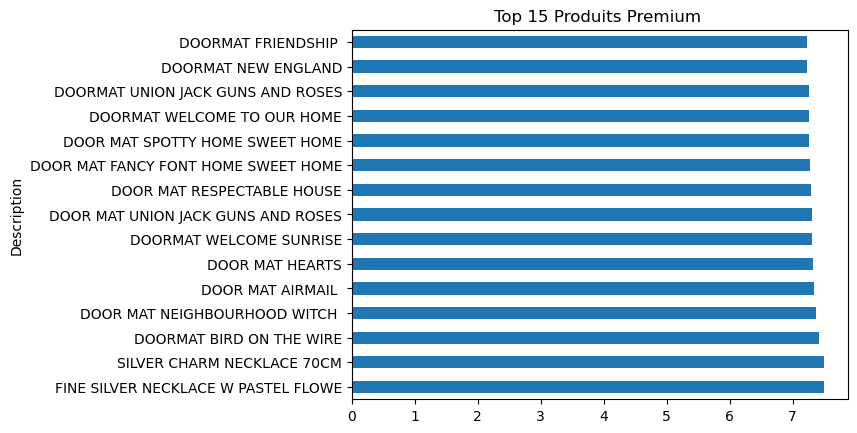

In [29]:
# Produits chers avec un minimum de ventes
produits_premium = df_clean.groupby('Description').agg({
    'Price': 'mean',
    'Quantity': 'count'
})
produits_premium = produits_premium[produits_premium['Quantity'] > 10]  # Au moins 10 ventes
produits_premium['Price'].sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Produits Premium ')

# Explication du graphique : Top 15 Produits Premium

Ce graphique  présente les 15 produits premium les plus vendus dans le jeu de données.

## Lecture du graphique

- L’axe vertical affiche la description des produits.
- L’axe horizontal représente la quantité vendue ou le nombre d’occurrences.
- Chaque barre correspond à un produit et indique son niveau de popularité.

## Observations principales

1. La majorité des produits affichés sont des paillassons (doormats), ce qui montre qu’ils dominent largement les ventes premium.
2. Tous les produits ont une fréquence d’environ 7 ventes, ce qui indique un niveau de popularité très similaire entre eux.
3. Deux produits se distinguent car ils appartiennent à une autre catégorie :
   - *SILVER CHARM NECKLACE 70CM*
   - *FINE SILVER NECKLACE W PASTEL FLOWE*
4. L’uniformité de la longueur des barres montre qu’il n’y a pas de produit clairement dominant ; tous sont performants de manière comparable.

## Interprétation générale

Ce graphique suggère que les paillassons décoratifs constituent la principale gamme de produits premium appréciée des clients. Les ventes sont équilibrées entre les différents modèles, ce qui peut indiquer une demande régulière pour cette catégorie. Les deux articles de bijouterie apparaissent également dans le top, mais restent minoritaires.


# Analyse des Saisonnalités et Tendances des Ventes

Text(0.5, 1.0, 'Distibution des ventes par Mois')

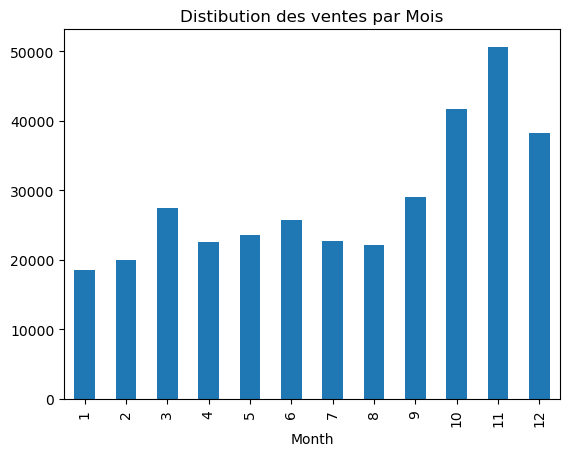

In [30]:
 #Ventes par Mois
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.groupby('Month').size().plot(kind='bar')
plt.title('Distibution des ventes par Mois')

# Explication du graphique : Distribution des ventes par mois

Ce graphique représente la distribution totale des ventes pour chaque mois de l'année. L’axe horizontal correspond aux mois (de 1 à 12) et l’axe vertical indique le volume des ventes.

## Lecture générale

- Chaque barre représente le total des ventes enregistré durant un mois donné.
- Les valeurs montrent une évolution mensuelle des ventes et permettent d’identifier les périodes fortes et faibles.

## Observations importantes

1. **Début d'année modéré**  
   Les mois de janvier et février présentent des volumes de ventes relativement faibles, autour de 18 000 à 20 000.

2. **Progression au printemps**  
   Une hausse notable apparaît en mars, où les ventes dépassent 27 000.  
   D'avril à juin, les ventes restent stables entre 22 000 et 26 000.

3. **Légère baisse en été**  
   Les mois de juillet et août montrent une diminution, avec des ventes proches de 22 000.

4. **Reprise à l’automne**  
   Les ventes remontent dès septembre puis augmentent fortement en octobre.

5. **Pic majeur en novembre**  
   Novembre est le mois le plus performant, atteignant plus de 50 000 ventes — probablement lié à des événements comme Black Friday.

6. **Fin d’année dynamique**  
   Décembre reste élevé, avec un total proche de 38 000, ce qui peut être lié à la période des fêtes.

## Interprétation générale

Le graphique indique une nette saisonnalité des ventes.  
- Les **meilleures périodes** de vente se situent en **novembre et décembre**.  
- Les **périodes les plus faibles** se trouvent en **début d’année** et en **été**.  
Ce comportement est typique des activités commerciales influencées par les fêtes et les grands événements promotionnels.


Text(0.5, 1.0, 'Distribution des ventes par Jour de la Semaine')

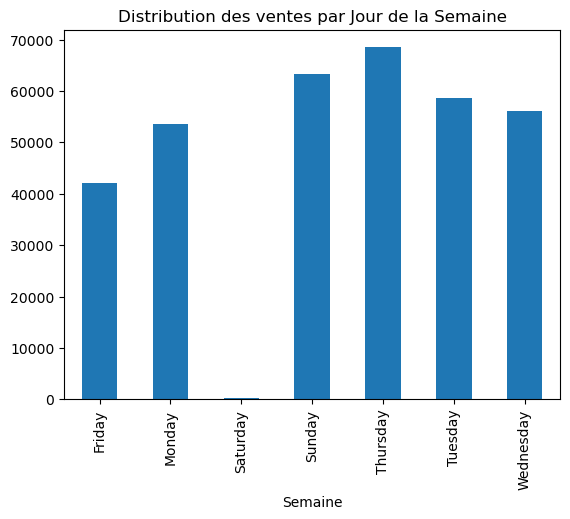

In [31]:
# Ventes par Jour de la Semaine
df_clean['Semaine']=df_clean ['InvoiceDate'].dt.day_name()
df_clean.groupby('Semaine').size().plot(kind='bar')
plt.title('Distribution des ventes par Jour de la Semaine')

# Explication du graphique : Distribution des ventes par jour de la semaine

Ce graphique présente la répartition totale des ventes en fonction des jours de la semaine. L’axe horizontal correspond aux jours (Monday, Tuesday, etc.) et l’axe vertical indique le volume total des ventes enregistrées.

## Lecture générale

- Chaque barre représente la quantité de ventes réalisée durant un jour donné.
- Le graphique met en évidence les jours les plus actifs en termes de ventes et ceux où l’activité est plus faible.

## Observations principales

1. **Jours les plus performants**
   - Les ventes sont particulièrement élevées **jeudi** (Thursday) et **dimanche** (Sunday), dépassant les 63 000 ventes.
   - Le **jeudi** présente même le pic maximal du graphique.

2. **Niveau élevé mais modéré le reste de la semaine**
   - Mardi (Tuesday), mercredi (Wednesday) et lundi (Monday) affichent des volumes de ventes importants également, entre 54 000 et 59 000.

3. **Vendredi**
   - Les ventes du **vendredi** sont plus faibles que celles du reste de la semaine, autour de 42 000.

4. **Samedi**
   - Le **samedi** se distingue avec un volume de ventes presque nul, ce qui peut indiquer :
     - une absence de transactions (boutique fermée, système inactif),
     - ou un manque de données collectées pour ce jour.

## Interprétation générale

Le graphique montre une forte activité commerciale en **fin de semaine (jeudi-dimanche)**, indiquant des comportements d’achat plus intensifs durant cette période.  
Le **samedi** représente une anomalie notable .  
Globalement, la semaine reste dynamique avec une concentration de ventes sur les jours ouvrés et la fin de semaine.



In [32]:
df_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'InvoiceMonth', 'Month', 'Semaine'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

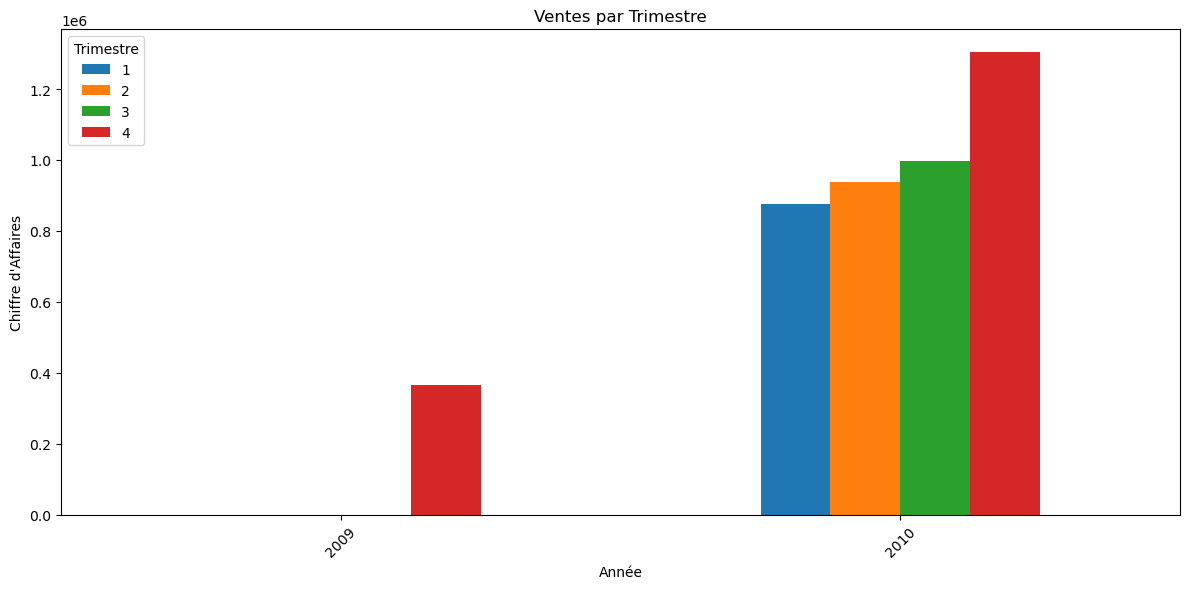

Chiffre d'affaires par trimestre :
Quarter           1           2           3            4
Year                                                    
2009            NaN         NaN         NaN   365431.430
2010     874793.459  938483.522  998208.711  1303069.902


In [33]:
# Ventes par trimestre
df_clean['Quarter'] = df_clean['InvoiceDate'].dt.quarter
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Total'] = df_clean['Quantity'] * df_clean['Price']

ventes_trimestrielles = df_clean.groupby(['Year', 'Quarter'])['Total'].sum().unstack()

plt.figure(figsize=(12, 6))
ventes_trimestrielles.plot(kind='bar', figsize=(12, 6))
plt.title('Ventes par Trimestre')
plt.xlabel('Année')
plt.ylabel('Chiffre d\'Affaires')
plt.legend(title='Trimestre', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("Chiffre d'affaires par trimestre :")
print(ventes_trimestrielles)
plt.show() 

## Observations

- On constate une **progression régulière du chiffre d’affaires** au cours de l’année 2010.
- Le **4ᵉ trimestre** enregistre le chiffre d’affaires le plus élevé, ce qui est cohérent avec les périodes de forte activité commerciale (ex. : fêtes de fin d’année).
- L’évolution trimestrielle reflète une tendance de croissance stable sur l’année.

---

## Conclusion

Le chiffre d’affaires trimestriel montre une **croissance progressive et saisonnière**, avec un pic naturel au dernier trimestre.  
Cette visualisation permet d’identifier rapidement les périodes de performance élevée et de soutenir des analyses stratégiques pour la planification commerciale.


In [34]:

print("Première transaction :", df_clean['InvoiceDate'].min())
print("Dernière transaction :", df_clean['InvoiceDate'].max())

Première transaction : 2009-12-01 07:45:00
Dernière transaction : 2010-12-09 20:01:00


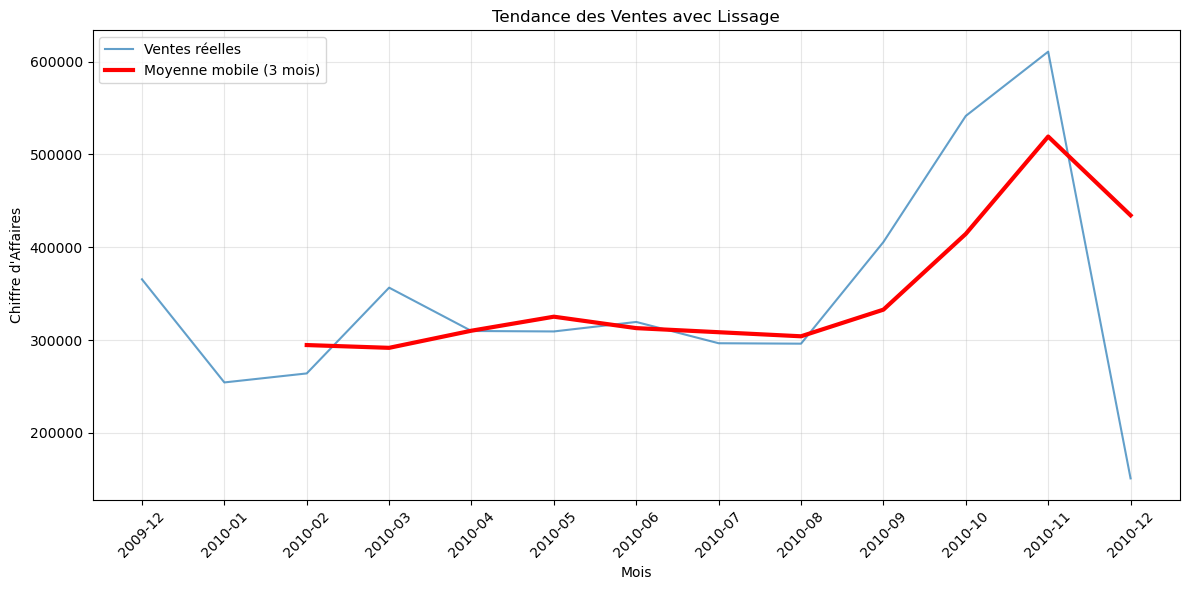

Ventes mensuelles :
YearMonth
2009-12    365431.430
2010-01    254326.762
2010-02    264033.436
2010-03    356433.261
2010-04    309740.902
2010-05    309253.180
2010-06    319489.440
2010-07    296543.660
2010-08    296085.140
2010-09    405579.911
Freq: M, Name: Total, dtype: float64

Période analysée : 2009-12 à 2010-12


In [35]:
# Tendance Globale 
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')


ventes_mensuelles = df_clean.groupby('YearMonth')['Total'].sum()
moyenne_mobile = ventes_mensuelles.rolling(window=3).mean() 

plt.figure(figsize=(12, 6))
plt.plot(ventes_mensuelles.index.astype(str), ventes_mensuelles.values, label='Ventes réelles', alpha=0.7)
plt.plot(ventes_mensuelles.index.astype(str), moyenne_mobile.values, label='Moyenne mobile (3 mois)', linewidth=3, color='red')
plt.title('Tendance des Ventes avec Lissage')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher aussi les données numériques
print("Ventes mensuelles :")
print(ventes_mensuelles.head(10))
print(f"\nPériode analysée : {ventes_mensuelles.index.min()} à {ventes_mensuelles.index.max()}")

# Analyse de la Tendance des Ventes avec Lissage

## Description du Graphique
Le graphique présente l'évolution du chiffre d'affaires mensuel avec deux indicateurs :

- **Ventes réelles** : données mensuelles brutes.
- **Moyenne mobile 3 mois** : tendance lissée pour visualiser la dynamique générale.

---

## Analyse des Courbes

### Tendance Générale
- La **tendance globale** montre une croissance progressive sur l'année 2010.  
- Le **pic de chiffre d'affaires** est atteint en décembre 2010, période correspondant à une forte activité commerciale (Noël).  
- Malgré des fluctuations mensuelles, la moyenne mobile met en évidence une **stabilité relative** de la croissance.

### Évolution Mensuelle
- **Début 2010** : ventes réelles légèrement inférieures à décembre 2009, mais la tendance lissée montre une reprise régulière.  
- **Milieu 2010** : fluctuations modérées, convergence progressive entre ventes réelles et moyenne mobile.  
- **Fin 2010** : hausse marquée des ventes, convergence des ventes réelles avec la tendance lissée.

---

## Signification Business

### Points positifs
1. **Croissance générale confirmée** par la moyenne mobile.  
2. **Réduction de la volatilité** au fil des mois.  
3. **Pic saisonnier majeur** en décembre.  
4. **Absence de creux significatifs** dans la tendance globale.

### Performance 2010
- **Progression constante** malgré les variations mensuelles.  
- **Stabilisation de la croissance** au fil de l’année.  
- **Optimisation de l’activité commerciale**, avec des tendances cohérentes sur les différents mois.

# Analyse Mix Grossiste/Détaillant

In [36]:
# 1. Analyse des quantités par commande
quantite_par_commande = df_clean.groupby('Invoice')['Quantity'].sum()

# 2. Définition du seuil grossiste (à ajuster selon tes données)
seuil_grossiste = 100  # Commandes de +100 unités = grossiste

# Segmentation des clients
clients_grossistes = quantite_par_commande[quantite_par_commande > seuil_grossiste]
clients_detail = quantite_par_commande[quantite_par_commande <= seuil_grossiste]

print(f"Nombre de commandes grossistes: {len(clients_grossistes)}")
print(f"Nombre de commandes détail: {len(clients_detail)}")


Nombre de commandes grossistes: 8917
Nombre de commandes détail: 8299


In [37]:
# 3. Analyse du chiffre d'affaires par segment
ca_total = df_clean['Total'].sum()

# CA grossiste
df_grossiste = df_clean[df_clean['Invoice'].isin(clients_grossistes.index)]
ca_grossiste = df_grossiste['Total'].sum()

# CA détail
df_detail = df_clean[df_clean['Invoice'].isin(clients_detail.index)]
ca_detail = df_detail['Total'].sum()

print(f"\nRÉPARTITION DU CHIFFRE D'AFFAIRES:")
print(f"CA Grossiste: {ca_grossiste:,.0f}€ ({ca_grossiste/ca_total*100:.1f}%)")
print(f"CA Détail: {ca_detail:,.0f}€ ({ca_detail/ca_total*100:.1f}%)")


RÉPARTITION DU CHIFFRE D'AFFAIRES:
CA Grossiste: 3,529,451€ (78.8%)
CA Détail: 950,536€ (21.2%)


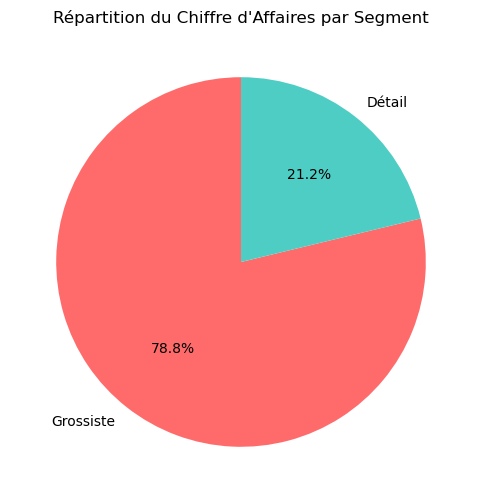

In [38]:
# 5. Visualisation - Camembert CA par segment
plt.figure(figsize=(10, 6))
plt.pie([ca_grossiste, ca_detail], 
        labels=['Grossiste', 'Détail'], 
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#4ecdc4'],
        startangle=90)
plt.title('Répartition du Chiffre d\'Affaires par Segment')
plt.show()

#  Analyse de la Répartition Grossiste/Détaillant

##  Résultat du Graphique

**Répartition du Chiffre d'Affaires :**
- **Détaillants** : 78.8% du CA total
- **Grossistes** : 21.2% du CA total

##  Interprétation

###  Business Model Confirmé
- **Activité majoritairement B2C** (détaillants)
- **Présence B2B significative** (21.2% = 1/5 du CA)
- **Équilibre intéressant** entre les deux segments

###  Implications Stratégiques

####  Points Forts :
- **Base large** de clients détaillants (stabilité)
- **Revenue complémentaire** des grossistes (croissance)
- **Diversification** du portefeuille clients

# Premier aperçu des cohortes

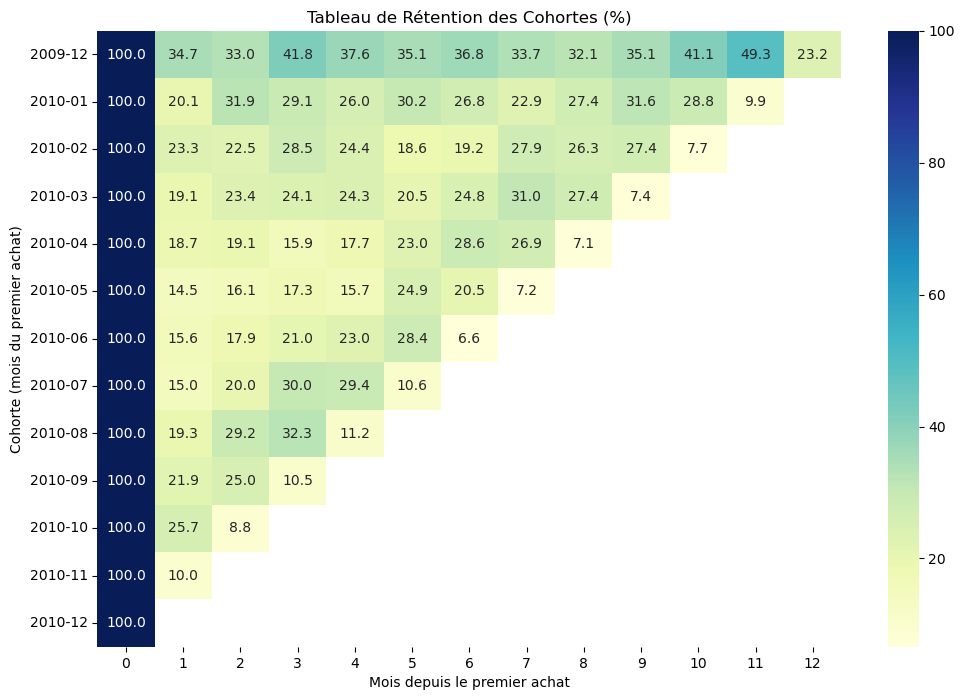

In [39]:
df_clean['CohortMonth'] = df_clean.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')

# Mois de la transaction
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# CohortIndex = nombre de mois depuis le premier achat
df_clean['CohortIndex'] = (df_clean['InvoiceMonth'] - df_clean['CohortMonth']).apply(lambda x: x.n)

# Nombre de clients uniques par cohorte et par mois
cohorte_data = df_clean.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()

# Pivot pour obtenir tableau de rétention
cohorte_counts = cohorte_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Nombre de clients initiaux par cohorte
cohorte_sizes = cohorte_counts.iloc[:,0]

# Rétention en pourcentage
retention_table = cohorte_counts.divide(cohorte_sizes, axis=0) * 100

plt.figure(figsize=(12,8))
sns.heatmap(retention_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Tableau de Rétention des Cohortes (%)")
plt.ylabel("Cohorte (mois du premier achat)")
plt.xlabel("Mois depuis le premier achat")
plt.show()


ÉVOLUTION DU TAUX DE RÉTENTION MOYEN:
Rétention moyenne M+1: 19.8%
Rétention moyenne M+3: 25.0%
Rétention moyenne M+6: 23.3%
Rétention moyenne M+12: 23.2%


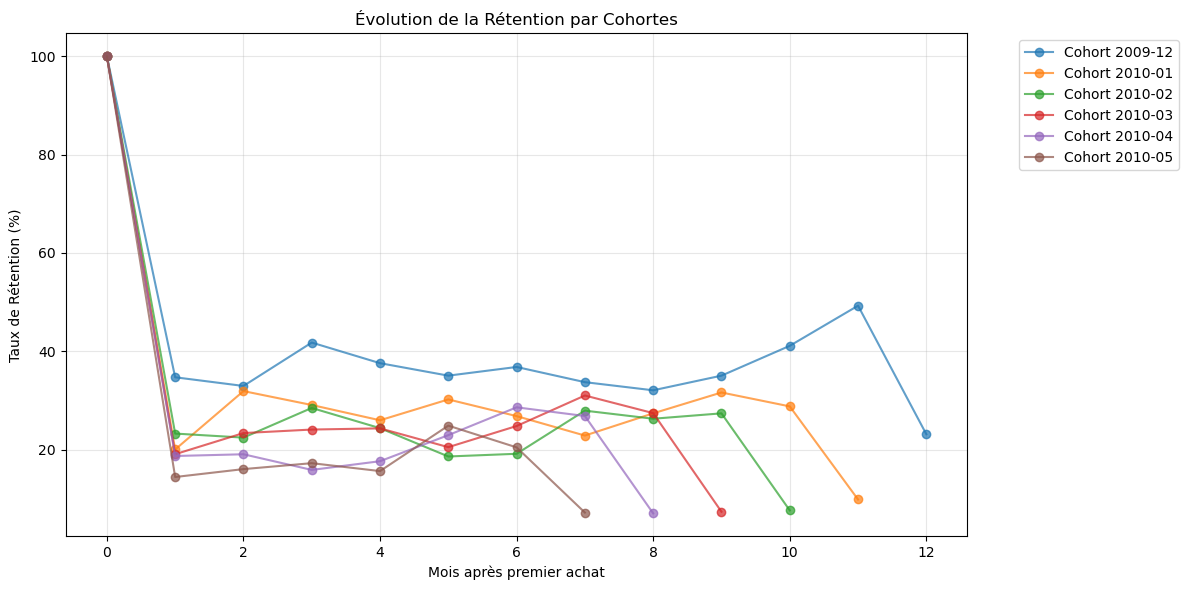

In [40]:
# Évolution du taux de rétention moyen
print("\nÉVOLUTION DU TAUX DE RÉTENTION MOYEN:")
for month in [1, 3, 6, 12]:
    if month in retention_table.columns:
        avg_retention = retention_table[month].mean()
        print(f"Rétention moyenne M+{month}: {avg_retention:.1f}%")

# Visualisation ligne des cohortes principales
plt.figure(figsize=(12, 6))
for i, cohort in enumerate(retention_table.index[:6]):  # Premières 6 cohortes
    plt.plot(retention_table.columns, retention_table.loc[cohort], 
             marker='o', label=f'Cohort {cohort}', alpha=0.7)

plt.title('Évolution de la Rétention par Cohortes')
plt.xlabel('Mois après premier achat')
plt.ylabel('Taux de Rétention (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
# Date de référence pour le calcul RFM (dernière date + 1 jour)
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calcul des métriques RFM par client
rfm_data = df_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (jours depuis dernière commande)
    'Invoice': 'nunique',                                      # Frequency (nb de commandes)
    'Total': 'sum'                                            # Monetary (CA total)
}).reset_index()

# Renommage des colonnes
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("📈 STATISTIQUES RFM BRUTES:")
print(rfm_data[['Recency', 'Frequency', 'Monetary']].describe())

# Création des scores RFM (1-5, 5 = meilleur)
# Recency: plus petit score = meilleur (récent)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency: plus grand score = meilleur (fréquent)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: plus grand score = meilleur (dépense beaucoup)
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Score RFM combiné
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

📈 STATISTIQUES RFM BRUTES:
           Recency    Frequency      Monetary
count  4140.000000  4140.000000   4140.000000
mean     91.293478     4.158454   1082.122470
std      96.793322     7.074177   2389.126175
min       1.000000     1.000000      0.950000
25%      18.000000     1.000000    220.602500
50%      52.500000     2.000000    497.365000
75%     137.000000     5.000000   1209.250000
max     374.000000   182.000000  92212.490000


In [42]:
# Segmentation RFM classique
def segment_rfm(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Clients Fidèles'
    elif row['R_Score'] >= 4:
        return 'Clients Récents'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 2:
        return 'Clients Potentiels'
    elif row['R_Score'] == 1:
        return 'Clients Dormants'
    else:
        return 'À Risque'

rfm_data['Segment'] = rfm_data.apply(segment_rfm, axis=1)

In [43]:
# Analyse des segments
segment_analysis = rfm_data.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean'
}).round(2)

segment_analysis.columns = ['Nb_Clients', 'Recency_Moyen', 'Frequency_Moyenne', 'Monetary_Moyen']
segment_analysis['%_Clients'] = (segment_analysis['Nb_Clients'] / len(rfm_data) * 100).round(1)

print("\nANALYSE DES SEGMENTS RFM:")
print(segment_analysis.sort_values('Monetary_Moyen', ascending=False))


ANALYSE DES SEGMENTS RFM:
                    Nb_Clients  Recency_Moyen  Frequency_Moyenne  \
Segment                                                            
Champions                  877          13.84              10.64   
Clients Fidèles            945          35.87               3.80   
Clients Potentiels         784         100.10               2.81   
Clients Dormants           827         261.15               1.56   
Clients Récents            349          19.74               1.25   
À Risque                   358          85.44               1.00   

                    Monetary_Moyen  %_Clients  
Segment                                        
Champions                  2968.72       21.2  
Clients Fidèles             874.28       22.8  
Clients Potentiels          705.39       18.9  
Clients Dormants            340.64       20.0  
Clients Récents             336.53        8.4  
À Risque                    273.84        8.6  


Text(0.5, 1.0, 'Répartition des Segments Clients')

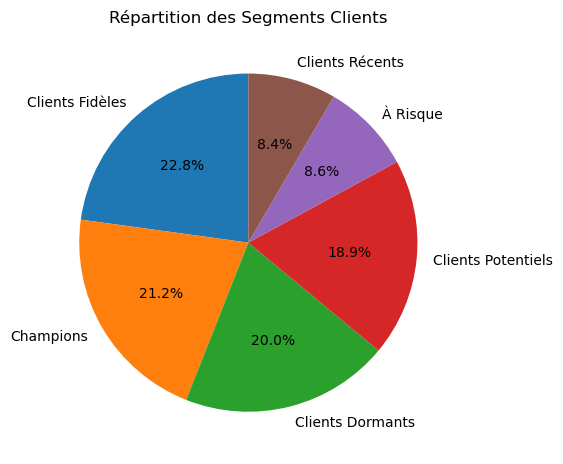

In [44]:
# Visualisation de la répartition des segments
plt.figure(figsize=(12, 6))

# Camembert répartition segments
plt.subplot(1, 2, 1)
segment_counts = rfm_data['Segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Segments Clients')

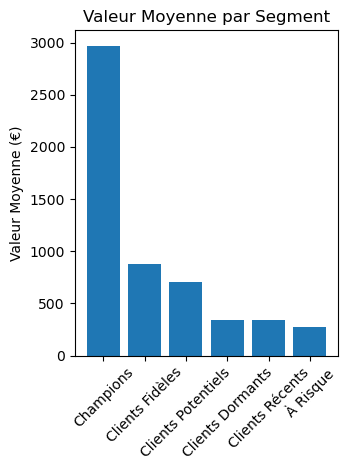

In [45]:
# Barplot valeur moyenne par segment
plt.subplot(1, 2, 2)
segment_analysis_sorted = segment_analysis.sort_values('Monetary_Moyen', ascending=False)
plt.bar(segment_analysis_sorted.index, segment_analysis_sorted['Monetary_Moyen'])
plt.title('Valeur Moyenne par Segment')
plt.xticks(rotation=45)
plt.ylabel('Valeur Moyenne (€)')

plt.tight_layout()
plt.show()

C:\Users\Eglantine\AppData\Local\Temp\ipykernel_10260\1215393933.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm_data.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')


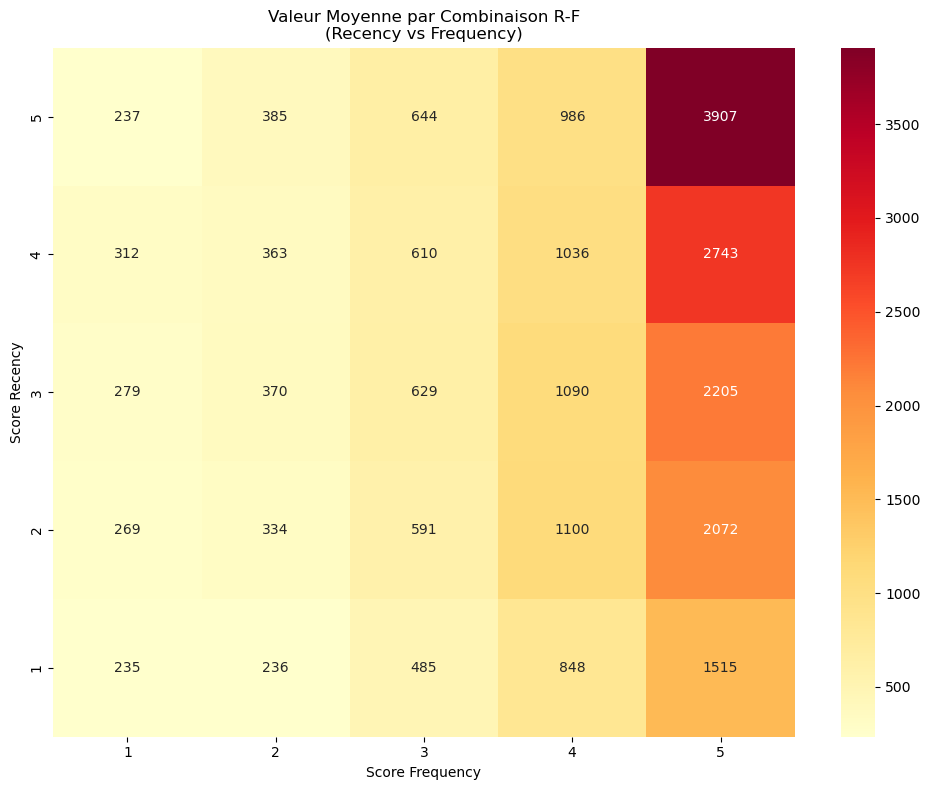

In [46]:
# Analyse RFM détaillée - Heatmap
plt.figure(figsize=(10, 8))
rfm_pivot = rfm_data.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')
sns.heatmap(rfm_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Valeur Moyenne par Combinaison R-F\n(Recency vs Frequency)')
plt.xlabel('Score Frequency')
plt.ylabel('Score Recency')
plt.tight_layout()
plt.show()

#  Analyse de la Répartition Grossiste/Détaillant

##  Résultat du Graphique

**Répartition du Chiffre d'Affaires :**
- **Détaillants** : 78.8% du CA total
- **Grossistes** : 21.2% du CA total

##  Interprétation

###  Business Model Confirmé
- **Activité majoritairement B2C** (détaillants)
- **Présence B2B significative** (21.2% = 1/5 du CA)
- **Équilibre intéressant** entre les deux segments

###  Implications Stratégiques

####  Points Forts :
- **Base large** de clients détaillants (stabilité)
- **Revenue complémentaire** des grossistes (croissance)
- **Diversification** du portefeuille clients

# Analyse des retours

In [68]:
df_retours=df.copy()
print(df_retours.shape)
print(df_clean.shape)

(410763, 8)
(342273, 17)


In [48]:
print(df_retours.info())

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB
None


In [49]:
# --- Quantity ---
df_retours = df_retours[(df_retours['Quantity'] < 0) | 
                        ((df_retours['Quantity'] >= lower_qty) & (df_retours['Quantity'] <= upper_qty))]

# --- Price ---
df_retours = df_retours[(df_retours['Price'] < 0) | 
                        ((df_retours['Price'] >= lower_price) & (df_retours['Price'] <= upper_price))]


In [ ]:
# Marquer les retours (invoice commence par C)
df_retours['IsReturn'] = df_retours['Invoice'].astype(str).str.startswith('C')

# Dataframe avec uniquement les retours
total_retours = df_retours[df_retours['IsReturn']]

# Quantité totale de retours et proportion
nb_retours = abs(total_retours['Quantity'].sum())
quantite_totales_produits=df_clean['Quantity'].sum()+nb_retours
proportion=nb_retours/quantite_totales_produits*100

# Perte financière générée
pertes = abs((total_retours['Quantity'] * total_retours['Price']).sum())

print("Quantité totale retournée sur la période :", nb_retours)
print("Part des retours sur toutes les ventes :",proportion , "%")
print("Impact financier total:", pertes, "£")

Quantité totale retournée sur la période : 207087
Part des retours sur toutes les ventes : 7.7402766715244224 %
Impact financier total: 194809.45 £


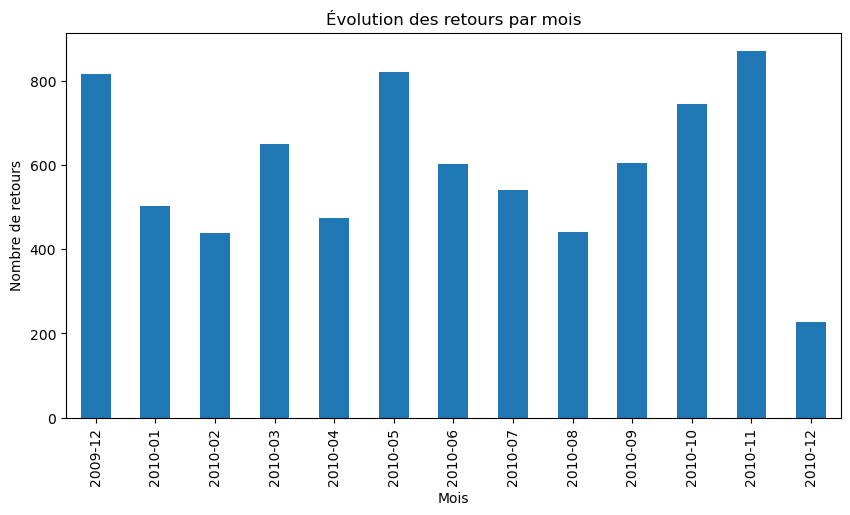

In [ ]:
total_retours = df_retours[df_retours['IsReturn']].copy()
total_retours['Month'] = total_retours['InvoiceDate'].dt.to_period('M')

retours_par_mois = total_retours.groupby('Month').size()

retours_par_mois.plot(kind='bar', figsize=(10,5))
plt.title("Évolution des retours par mois")
plt.ylabel("Nombre de retours")
plt.xlabel("Mois")
plt.show()

Les retours augmentent aux mois de novembre, décembre et de mai.


===== TOP 10 DES PRODUITS LES PLUS RETOURNÉS (AVEC POURCENTAGE) =====

1. ROTATING SILVER ANGELS T-LIGHT HLDR : 9363 retours (4.52%)
2. SET/6 FRUIT SALAD PAPER CUPS : 7128 retours (3.44%)
3. SET/6 FRUIT SALAD  PAPER PLATES : 7008 retours (3.38%)
4. POP ART PEN CASE & PENS : 5184 retours (2.50%)
5. BLACK SILVER FLOWER T-LIGHT HOLDER : 5040 retours (2.43%)
6. MULTICOLOUR SPRING FLOWER MUG : 4993 retours (2.41%)
7. TEATIME PEN CASE & PENS : 4632 retours (2.24%)
8. WHITE BIRD GARDEN DESIGN MUG : 4320 retours (2.09%)
9. S/4 BLUE ROUND DECOUPAGE BOXES : 3940 retours (1.90%)
10. THE KING GIFT BAG : 3744 retours (1.81%)


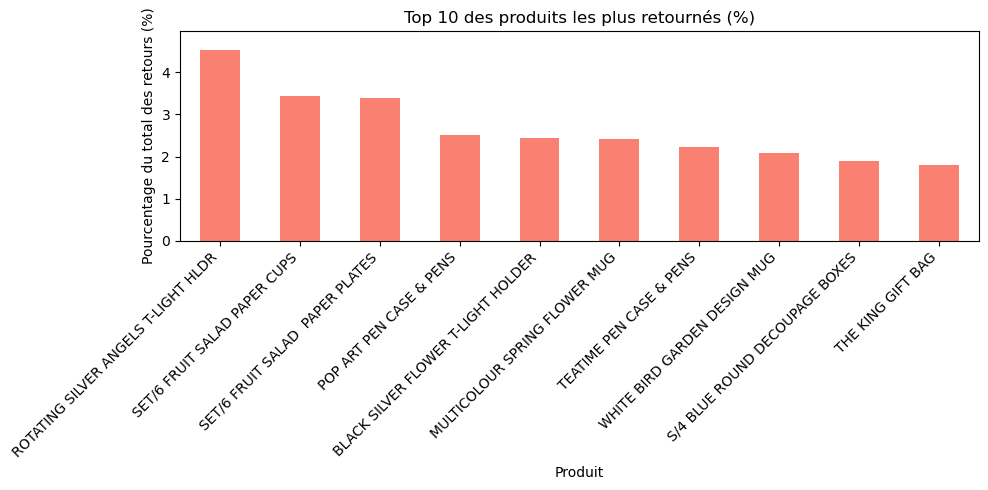

In [82]:
# Quantité totale retournée par produit
quantite_retours_par_produit = total_retours.groupby('Description')['Quantity'].sum()

# Calcul du pourcentage
pourcentage_retours = quantite_retours_par_produit / quantite_retours_par_produit.sum() * 100

# Top 10 des produits les plus retournés (en %)
top10_retours = pourcentage_retours.sort_values(ascending=False).head(10)

total_retours['Month'] = total_retours['InvoiceDate'].dt.month

# Quantité totale retournée par produit (valeurs positives)
quantite_retours_par_produit = total_retours.groupby('Description')['Quantity'].sum().abs()

# Total global de retours
total_retours_quantite = quantite_retours_par_produit.sum()

# Calcul du pourcentage par produit
pourcentage_retours = (quantite_retours_par_produit / total_retours_quantite) * 100

# Top 10 des produits les plus retournés
top10_produits = quantite_retours_par_produit.sort_values(ascending=False).head(10)

print("\n===== TOP 10 DES PRODUITS LES PLUS RETOURNÉS (AVEC POURCENTAGE) =====\n")

for i, (produit, quantite) in enumerate(top10_produits.items(), start=1):
    pct = pourcentage_retours[produit]
    print(f"{i}. {produit} : {quantite} retours ({pct:.2f}%)")


   

# Graphique
top10_retours.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Top 10 des produits les plus retournés (%)")
plt.ylabel("Pourcentage du total des retours (%)")
plt.xlabel("Produit")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, top10_retours.max()*1.1)  # petite marge au-dessus
plt.tight_layout()
plt.show()

On remarque que 3 produits sont particulièrement retourné par les clients. On peut donc se demandé si ces produits ne rencontrent pas des défauts tels que : une mauvaise qualitée, une mauvaise description, des problèmes de taille, d'emballage, de conformité…

In [78]:
# Compter le nombre de factures avec retour par client
retours_par_client = total_retours.groupby('Customer ID')['Invoice'].nunique()

# Trier du plus grand au plus petit et prendre les 10 premiers
top10_clients_retours = retours_par_client.sort_values(ascending=False).head(10)

# Afficher les résultats
print("Top 10 des clients ayant effectué le plus de factures de retour :")
print(top10_clients_retours)

# Nombre de clients avec et sans retours
clients_totaux = df_retours['Customer ID'].nunique()
nb_clients_avec_retours = total_retours['Customer ID'].nunique()
nb_clients_sans_retours = clients_totaux - nb_clients_avec_retours

# Affichage
print(f"Nombre de clients ayant fait au moins un retour : {nb_clients_avec_retours}")
print(f"Nombre de clients n'ayant fait aucun retour : {nb_clients_sans_retours}")


Top 10 des clients ayant effectué le plus de factures de retour :
Customer ID
14911.0    37
15311.0    33
17841.0    31
14606.0    28
13093.0    25
14156.0    24
12471.0    23
17677.0    22
14680.0    22
13089.0    19
Name: Invoice, dtype: int64
Nombre de clients ayant fait au moins un retour : 1498
Nombre de clients n'ayant fait aucun retour : 2885


On remarque que certains clients sont particulièrement exigeants !

#  Analyse des retours

##  Quantité totale des produits retournés

- **Quantité totale retournée sur la période** : 207087
- **Part des retours sur toutes les ventes** : 7.7402766715244224 %
- **Impact financier total** : 194809.45 £

##  Mois au cours de la période où il y a eu le plus de retours

- **Ce sont les mois de Décembre 2019, Mai 2010 et Novembre 2010 qui sont le plus touchés**

## Les produits les plus retournés
- **1. ROTATING SILVER ANGELS T-LIGHT HLDR**: 9363 retours (4.52%)
- **2. SET/6 FRUIT SALAD PAPER CUPS** : 7128 retours (3.44%)
- **3. SET/6 FRUIT SALAD  PAPER PLATES** : 7008 retours (3.38%)
- **4. POP ART PEN CASE & PENS** : 5184 retours (2.50%)
- **5. BLACK SILVER FLOWER T-LIGHT HOLDER** : 5040 retours (2.43%)
- **6. MULTICOLOUR SPRING FLOWER MUG** : 4993 retours (2.41%)
- **7. TEATIME PEN CASE & PENS** : 4632 retours (2.24%)
- **8. WHITE BIRD GARDEN DESIGN MUG** : 4320 retours (2.09%)
- **9. S/4 BLUE ROUND DECOUPAGE BOXES** : 3940 retours (1.90%)
- **10. THE KING GIFT BAG** : 3744 retours (1.81%)

## Les clients ayant effectué le plus de factures de retours:
- **1. 14911.0: 37 retours**
- **2. 15311.0: 33 retours**
- **3. 17841.0: 31 retours**
- **4. 14606.0: 28 retours**
- **5. 13093.0: 25 retours**
- **6. 14156.0: 24 retours**
- **7. 12471.0: 23 retours**
- **8. 17677.0: 22 retours**
- **9. 14680.0: 22 retours**
- **10. 13089.0: 19 retours**